# part 1

## preparing

In [0]:
from __future__ import print_function
from sklearn.datasets import load_files
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

#loading stopwords
print("loading stop words")
stop_words = set(stopwords.words('english'))
stop_words.add('.')
stop_words.add(',')
stop_words.add(')')
stop_words.add('(')
stop_words.add('%')
stop_words.add('wa')
stop_words.add('thi')
stop_words.add('+/-')
stop_words.add('H.')
stop_words.add('A.')
stop_words.add('+/-')
stop_words.add(';')
stop_words.add('patient')
stop_words.add('liver')
stop_words.add('alcohol')
print("done")


#help functions

#get sting do pre-processing
def preprocess(stri):
    tokens=[]
    stri.lower()
    word_tokens = word_tokenize(stri)
    filtered_sentence = []
    for w in word_tokens:
        filtered_sentence.append(ps.stem(w))
    stri= " ".join(filtered_sentence)
    word_tokens = word_tokenize(stri)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
            tokens.append(w)
    return tokens

#count the number of appearans of all words
def count(tokens):
    s=set()
    num=[]
    names=[]
    for name in tokens:
        if (name not in s):
            s.add(name)
            num.append(tokens.count(name))
            names.append(name)
    return num,names

#sorting dict and return 10 top
def getTOP10(dict,category):
    list=[category]
    s=sorted(dict.items(), key=lambda kv: kv[1])
    for i in range(len(s)-1,0,-1):
        if(len(list)==11):
            return list
        list.append(s[i])
   


loading stop words
done


## loading data and split to train and test

In [0]:
#get path of data and loadig data and split
print("Loading data and split")
path="C:/Users/dor17/Desktop/עבודות סמסטר ז/היבטים עבודות/היבטים עבודה 2/HW2/ohsumed-first-20000-docs"
testSet = load_files(path+"/test",encoding="utf-8")
trainSet = load_files(path+"/training",encoding="utf-8")
print("done")

tokenTrain=set()
tokenTest=set()

Loading data and split
done


## Text-Pre proccesing ,Clean and normalize the text

In [0]:
########lower case ###########

print("start lower case:")
# change to lower case in train data 
print("train data")
for i in range(0,len(trainSet.data)):
    trainSet.data[i]=trainSet.data[i].lower()
print("done")
    
    
####stemming#####   
ps = PorterStemmer()
print("strat stemming")

#stemming to train data  
print("train data")
for i in range(0,len(trainSet.data)):
    word_tokens = word_tokenize(trainSet.data[i])
    filtered_sentence = []
    for w in word_tokens:
        filtered_sentence.append(ps.stem(w))
    trainSet.data[i] = " ".join(filtered_sentence)
print("done")

#remove stopwords &and do toknize
print("strat stop-words and tokenization")
#train data
print("train data")
for i in range(0,len(trainSet.data)):
    word_tokens = word_tokenize(trainSet.data[i])
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
            tokenTrain.add(w)
    trainSet.data[i]=" ".join(filtered_sentence)
print("done")    

start lower case:
train data
done
strat stemming
train data
done
strat stop-words and tokenization
train data
done


## Explore the dataset

In [0]:
#number of categories and who is the categories
categories = trainSet.target_names
print("%d categories" % len(categories))
print("categories values: ",categories)
print()

#number docs each category
#train data
print("in train data")
print("docs per category table:")
listc=[]
listd=[]
for category in trainSet.target_names:
    listc.append(category)
    listd.append(len(([name for name in os.listdir(path+"/training/"+category) if os.path.isfile(os.path.join(path+"/training/"+category, name))])))
df=pd.DataFrame({'Category':listc, 'Documents':listd })   
display(df)



23 categories
categories values:  ['C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23']

in train data
docs per category table:


,Category,Documents
0,C01,423
1,C02,158
2,C03,65
3,C04,1163
4,C05,283
5,C06,588
6,C07,100
7,C08,473
8,C09,125
9,C10,621


top 10 table:
634


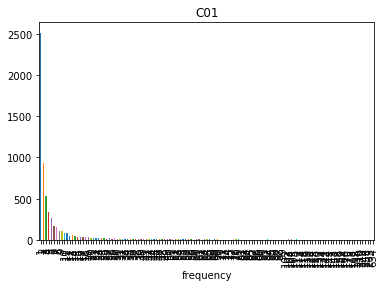

274


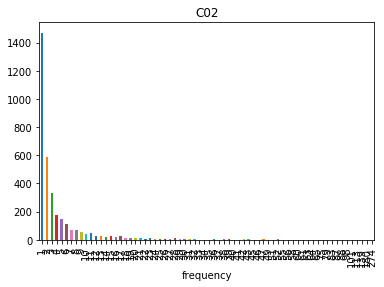

92


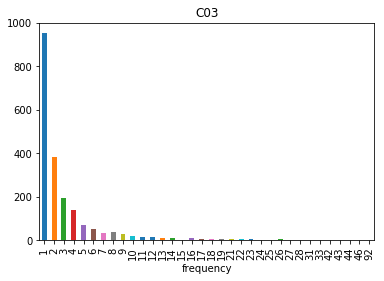

1614


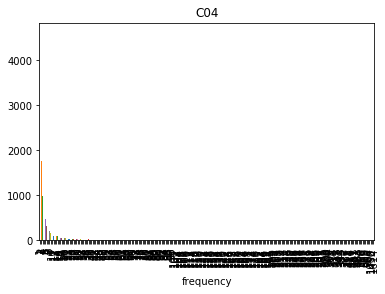

214


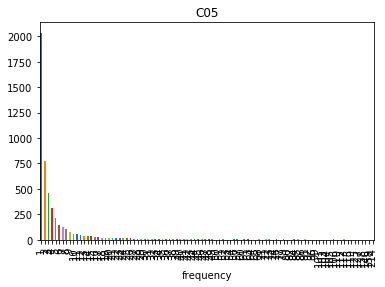

539


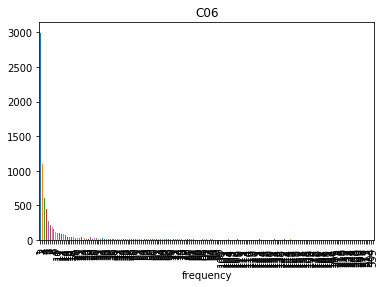

64


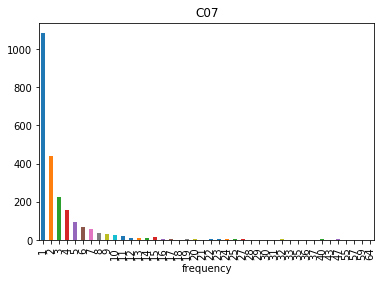

465


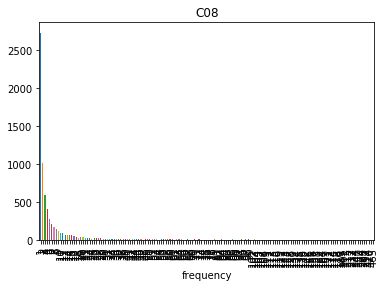

81


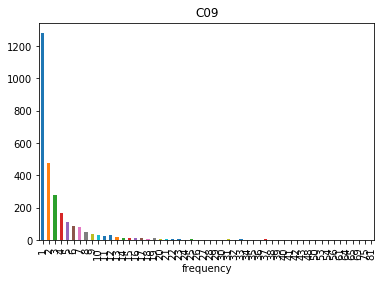

396


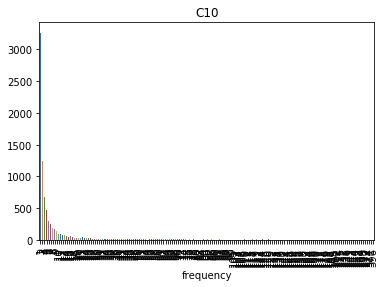

176


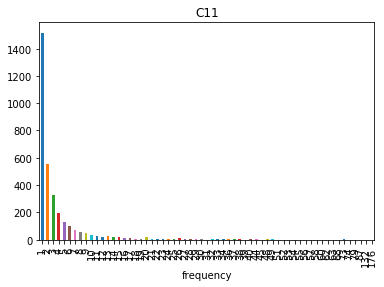

569


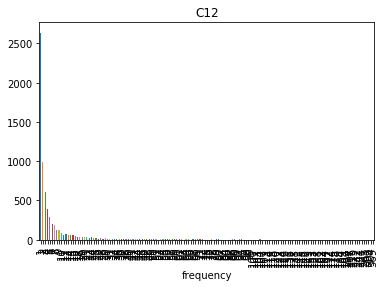

321


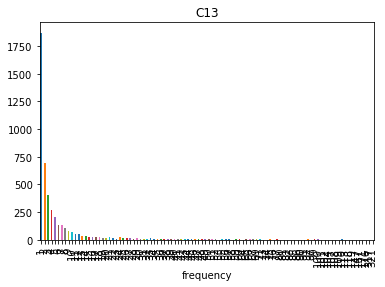

1273


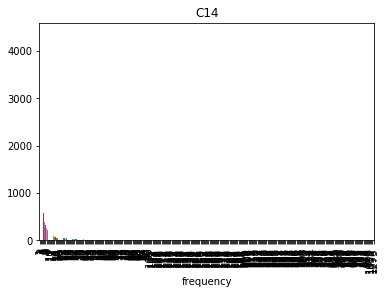

242


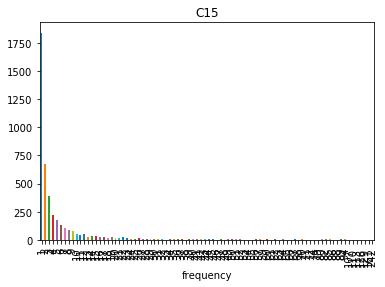

142


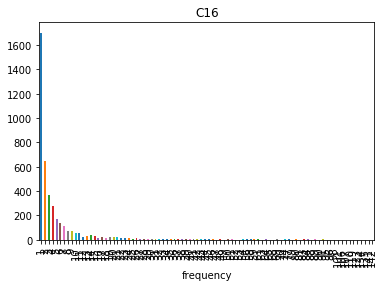

242


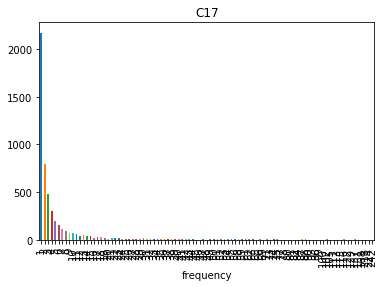

716


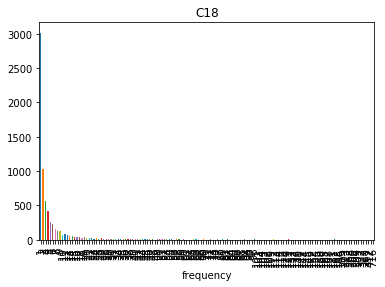

264


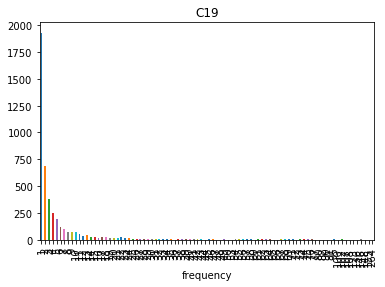

601


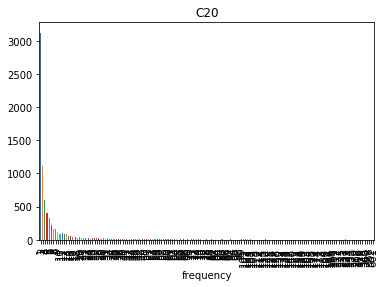

589


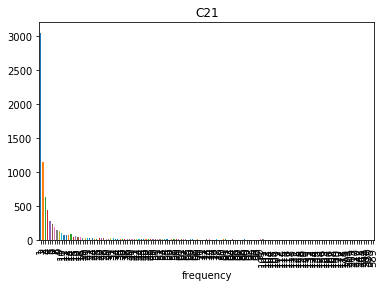

115


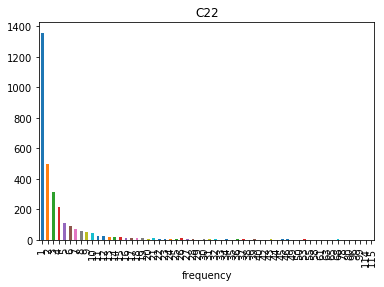

1207


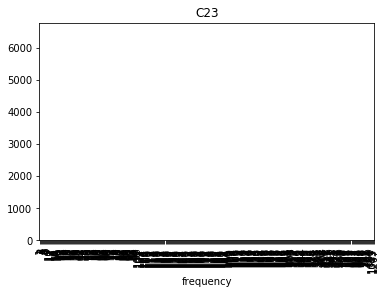

,Category,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10
0,C01,"(infect, 634)","(treatment, 265)","(group, 258)","(case, 244)","(diseas, 240)","(use, 210)","(studi, 198)","(clinic, 192)","(therapi, 178)","(:, 175)"
1,C02,"(infect, 274)","(viru, 180)","(human, 139)","(cell, 113)","(immunodefici, 101)","(diseas, 98)","(studi, 88)","(hiv, 87)","(case, 83)","(clinic, 79)"
2,C03,"(infect, 92)","(type, 58)","(measl, 47)","(diseas, 46)","(wound, 46)","(parasit, 44)","(studi, 43)","(case, 42)","(prostat, 41)","(hiv-1, 38)"
3,C04,"(cell, 1614)","(tumor, 1450)","(cancer, 1000)","(carcinoma, 904)","(case, 700)","(studi, 695)","(use, 619)","(treatment, 566)","(diseas, 550)","(In, 506)"
4,C05,"(node, 253)","(bone, 214)","(leukemia, 192)","(metastat, 189)","(lymph, 173)","(studi, 158)","(melanoma, 156)","(adenocarcinoma, 152)","(use, 146)","(result, 138)"
5,C06,"(diseas, 539)","(studi, 404)","(group, 322)","(less, 313)","(use, 277)","(treatment, 276)","(In, 269)","(gastric, 261)","(ulcer, 260)","(hepat, 258)"
6,C07,"(pancreat, 212)","(esophag, 176)","(bile, 169)","(biliari, 151)","(gallbladd, 122)","(endoscop, 121)","(gallston, 114)","(periton, 113)","(knee, 112)","(pylori, 111)"
7,C08,"(lung, 465)","(pulmonari, 420)","(group, 314)","(studi, 297)","(diseas, 288)","(less, 264)","(use, 250)","(increas, 247)","(respiratori, 234)","(cell, 232)"
8,C09,"(bile, 169)","(gallbladd, 122)","(gallston, 114)","(pylori, 111)","(hip, 105)","(ear, 81)","(duoden, 80)","(use, 75)","(case, 69)","(studi, 65)"
9,C10,"(studi, 396)","(group, 371)","(use, 324)","(:, 272)","(pain, 270)","(A, 269)","(diseas, 264)","(result, 248)","(clinic, 245)","(dure, 244)"


In [0]:
import numpy as np
import matplotlib.ticker as mt
#terms distrabtion &top 10
#histogram for all ctegories how much tokens appears how much time!!!
print("top 10 table:")
dict=defaultdict()
listl=[]
for category in trainSet.target_names:
    stri=""
    dict_category=defaultdict()
    for name in os.listdir(path+"/training/"+category):
        f=open(path+"/training/"+category+"/"+name,"r")
        stri+=" "+f.read()
    tokens = preprocess(stri)
    num,names=count(tokens)
    for i in range(0,len(num)):
        dict_category[names[i]]=num[i]
        dict[names[i]]=num[i]#dictionary words and apperance
    list=getTOP10(dict,category) #list of 10 top
    listl.append(list)
    X = np.arange(len(dict_category))
    df2=pd.DataFrame.from_dict(data=dict_category,orient='index',columns=['frequency']).groupby(['frequency'])['frequency'].count()
    print(df2.index.max())
    hist = df2.plot(kind="bar")
    hist.set_title(category)
    plt.show()
df=pd.DataFrame(listl,columns=['Category','word1','word2','word3','word4','word5','word6','word7','word8','word9','word10'])
display(df)

# part 2

## Implement feature extraction

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer 

#tf-idf
#extract faeture tf-idf
print("Extracting features from the training data using a sparse vectorizer")
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.2, stop_words="english")
tfidf_train = vectorizer.fit_transform(trainSet.data)
tfidf_test = vectorizer.transform(testSet.data)


#hash
#extract faeture hash-vectorize
hash_vectorizer = HashingVectorizer()

hash_train = hash_vectorizer.fit_transform(trainSet.data)
hash_test = hash_vectorizer.fit_transform(testSet.data)

print("done")

Extracting features from the training data using a sparse vectorizer
done


## Classify using machine learning methods

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from time import time
from sklearn import metrics
#predict for tfidf
#function that show the accurancy metrices of 2 machine learning methode on tf-idf feature
def classificationTfidf(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(tfidf_train, trainSet.target)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(tfidf_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(testSet.target, pred)
    print("accuracy:   %0.3f" % score)

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time

#predict for hash
#function that show the accurancy metrices of 2 machine learning methode on hash vectorize feature
def classificationHash(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(hash_train, trainSet.target)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(hash_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(testSet.target, pred)
    print("accuracy:   %0.3f" % score)

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time


    


## Tf-idf feature classification by 2 methode 

In [0]:
results1 = []
print("#######TfIdf######")
for clf, name in ( (SGDClassifier(),"SVM"),(Perceptron(), "Perceptron")):
    print('=' * 80)
    print(name)
    results1.append(classificationTfidf(clf))

#######TfIdf######
SVM
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


train time: 0.591s
test time:  0.027s
accuracy:   0.377

Perceptron
________________________________________________________________________________
Training: 
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


train time: 0.444s
test time:  0.021s
accuracy:   0.290





```
# This is formatted as code
```

## hash vectorize feature classification by 2 methode 

In [0]:
results2 = []
print("######Hash vectorize######")
for clf, name in ( (SGDClassifier(),"SVM"),(Perceptron(), "Perceptron")):
    print('=' * 80)
    print(name)
    results2.append(classificationHash(clf))

######Hash vectorize######
SVM
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)
train time: 1.082s
test time:  0.579s
accuracy:   0.272

Perceptron
________________________________________________________________________________
Training: 
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)
train time: 0.964s
test time:  0.

# plots

### TF-IDF 

tfIdf


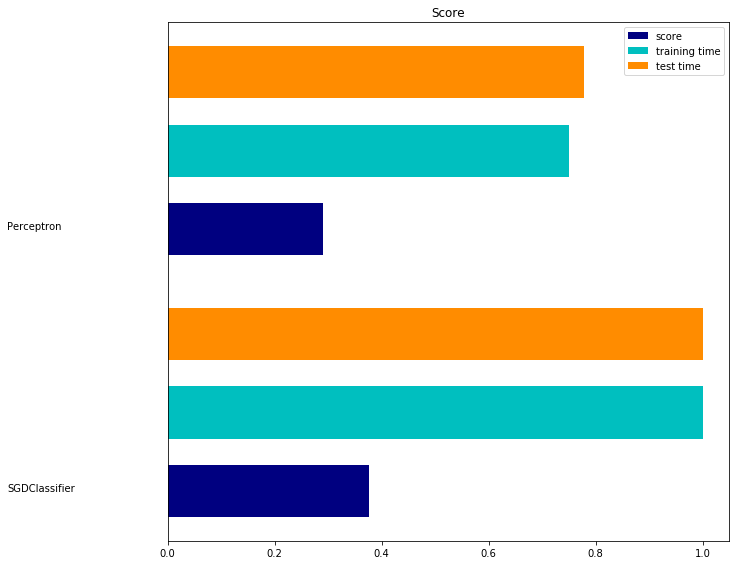

In [0]:

scores=[]
# make  plots of the svg and Perceptron for tfidf
print("tfIdf")
indices = np.arange(len(results1))

results = [[x[i] for x in results1] for i in range(4)]

clf_names, score, training_time, test_time = results
for s in score :
    scores.append(s)
training_time = np.array(training_time).astype(np.float) / np.max(training_time).astype(np.float)
test_time = np.array(test_time).astype(np.float) / np.max(test_time).astype(np.float)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

### HashVectorize 

Hash


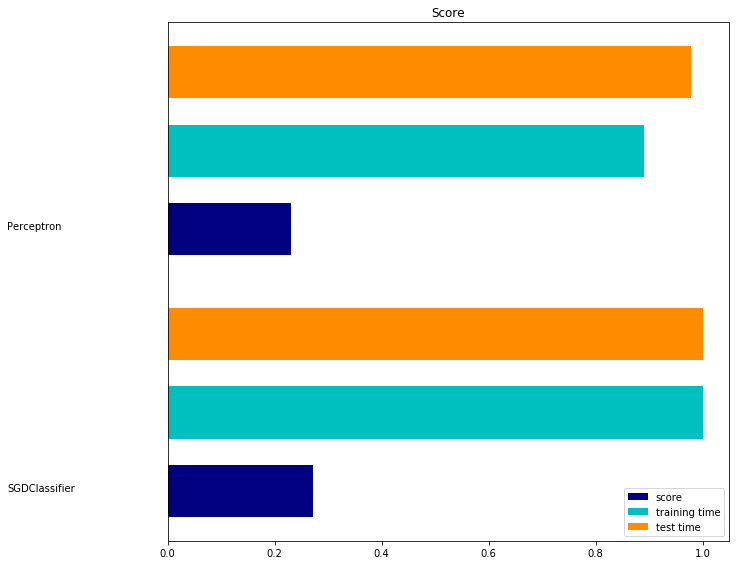

In [0]:
# make  plots of the svg and Perceptron for hash vectorize
print("Hash")

indices = np.arange(len(results2))

results = [[x[i] for x in results2] for i in range(4)]

clf_names, score, training_time, test_time = results
for s in score :
    scores.append(s)
training_time = np.array(training_time).astype(np.float) / np.max(training_time).astype(np.float)
test_time = np.array(test_time).astype(np.float) / np.max(test_time).astype(np.float)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

# compare-Table

In [0]:
#build table to comper the methodes
todf=[]
results = [[x[i] for x in results1] for i in range(4)]
clf_names, score, training_time, test_time=results
todf.append(['TF-IDF',clf_names[0],score[0]])
todf.append(['TF-IDF',clf_names[1],score[1]])
results = [[x[i] for x in results1] for i in range(4)]
clf_names, score, training_time, test_time=results
todf.append(['Hash-Vectorize',clf_names[0],score[0]])
todf.append(['Hash-Vectorize',clf_names[1],score[1]])
pd.DataFrame(todf,columns=['Extraction-method','Machine-Learning-Method','Accuracy'])

,Extraction-method,Machine-Learning-Method,Accuracy
0,TF-IDF,SGDClassifier,0.377209
1,TF-IDF,Perceptron,0.289563
2,Hash-Vectorize,SGDClassifier,0.377209
3,Hash-Vectorize,Perceptron,0.289563


# Conclustion

In [0]:
#choose the best methode + best feature
res=scores.index(max(scores))
print("the best methode to used in this case is:")
if(res==0):
    print("feature extraction = tfidf , classification by SGDClassifier")
if(res==1):
    print("feature extraction=tfidf,classification by Perceptron")
if(res==2):
    print("feature extraction=hashvectorize,classification by SGDClassifier")
if(res==3):
    print("feature extraction=hashvectorize,classification by Perceptron")

the best methode to used in this case is:
feature extraction = tfidf , classification by SGDClassifier
